In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
# Load the custom dataset
data = pd.read_csv('/content/train.csv',encoding='latin1')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [6]:
def preprocess_text(text):
    # Check if text is NaN
    if pd.isna(text):
        return ''
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

data['preprocessed_text'] = data['text'].apply(preprocess_text)

In [7]:
# Fill NaN values in the 'text' column with empty strings
data['text'].fillna('', inplace=True)

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)


In [9]:
# Convert text data into numerical features using TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [10]:
# Train a Linear Support Vector Classifier (SVM) model
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

# Predict sentiment on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6876478078952156


In [11]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()
# Train KNN classifier
knn_classifier.fit(X_train_tfidf, y_train)
# Predict sentiment on the test set
knn_pred = knn_classifier.predict(X_test_tfidf)
# Calculate accuracy
accuracy_knn = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", accuracy_knn)


KNN Accuracy: 0.46607240312897946


In [12]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train Random Forest classifier
rf_classifier.fit(X_train_tfidf, y_train)

# Predict sentiment on the test set
rf_pred = rf_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.6858286338002547


In [13]:
from sklearn.naive_bayes import MultinomialNB
# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train Naive Bayes classifier
nb_classifier.fit(X_train_tfidf, y_train)

# Predict sentiment on the test set
nb_pred = nb_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", accuracy_nb)

Naive Bayes Accuracy: 0.6388939421502637


In [14]:
from sklearn.linear_model import LogisticRegression
# Initialize Logistic Regression classifier
lr_classifier = LogisticRegression()
# Train Logistic Regression classifier
lr_classifier.fit(X_train_tfidf, y_train)
# Predict sentiment on the test set
lr_pred = lr_classifier.predict(X_test_tfidf)
# Calculate accuracy
accuracy_lr = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.6961979261415318


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.tree import DecisionTreeClassifier
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
# Train Decision Tree classifier
dt_classifier.fit(X_train_tfidf, y_train)
# Predict sentiment on the test set
dt_pred = dt_classifier.predict(X_test_tfidf)
# Calculate accuracy
accuracy_dt = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.6176096052392214


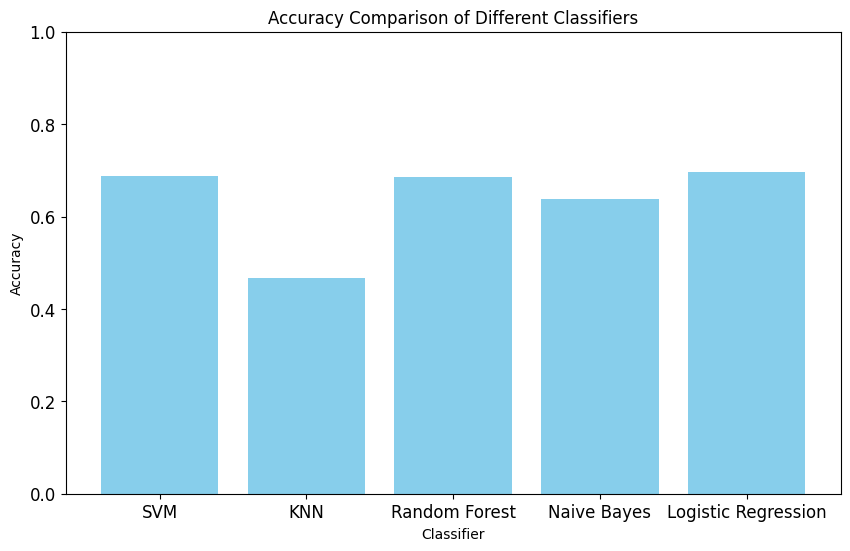

In [22]:
import matplotlib.pyplot as plt
# Accuracy values for each classifier
accuracies = [accuracy,accuracy_knn, accuracy_rf, accuracy_nb, accuracy_lr]
classifiers = ['SVM','KNN', 'Random Forest', 'Naive Bayes', 'Logistic Regression']
plt.figure(figsize=(10, 6))
# Create bar plot
plt.bar(classifiers, accuracies, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.ylim(0, 1)  # Set y-axis limit to 0-1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


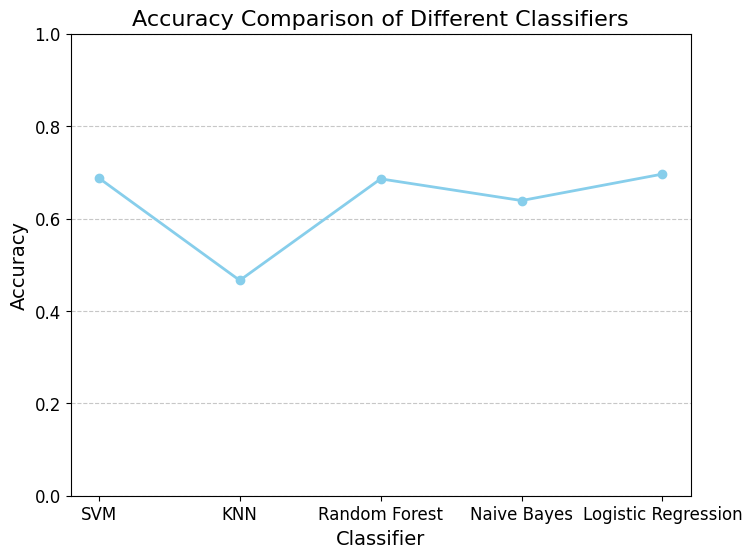

In [17]:
import matplotlib.pyplot as plt
# Accuracy values for each classifier
accuracies = [accuracy,accuracy_knn, accuracy_rf, accuracy_nb, accuracy_lr]
classifiers = ['SVM','KNN', 'Random Forest', 'Naive Bayes', 'Logistic Regression']
# Create line plot
plt.figure(figsize=(8, 6))
plt.plot(classifiers, accuracies, marker='o', linestyle='-', color='skyblue', linewidth=2)
plt.xlabel('Classifier', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy Comparison of Different Classifiers', fontsize=16)
plt.ylim(0, 1)  # Set y-axis limit to 0-1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

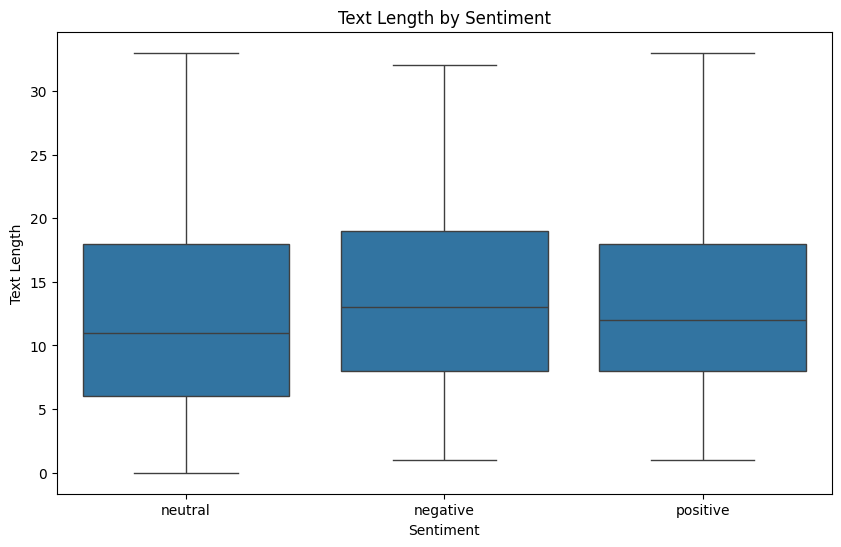

In [24]:
#Box Plot of Text Length by Sentiment: Comparing the distribution of text lengths (number of words or characters) across different sentiment categories.
# Calculate text lengths
import seaborn as sns  # Import Seaborn for visualization
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
data['text_length'] = data['text'].apply(lambda x: len(x.split()))
# Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='text_length', data=data)
plt.title('Text Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()


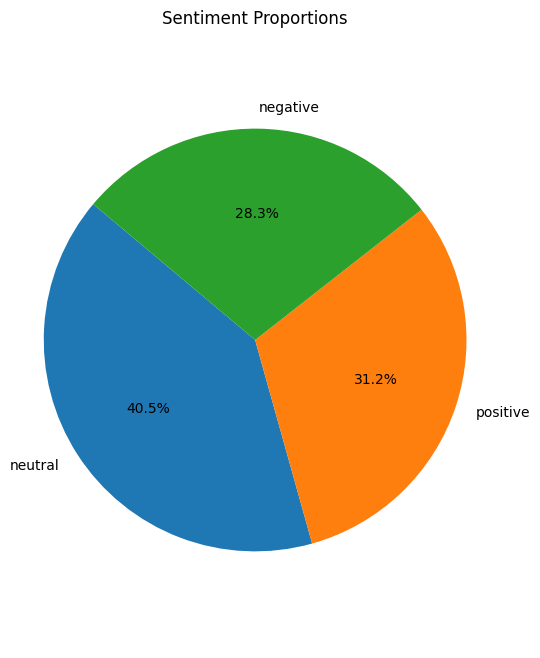

In [25]:
#Pie Chart of Sentiment Proportions: Illustrating the proportion of each sentiment label in the dataset. This provides a clear view of the overall sentiment composition.
# Calculate sentiment proportions
sentiment_counts = data['sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

# Plot pie chart
plt.figure(figsize=(6, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Proportions')
plt.axis('equal')
plt.show()


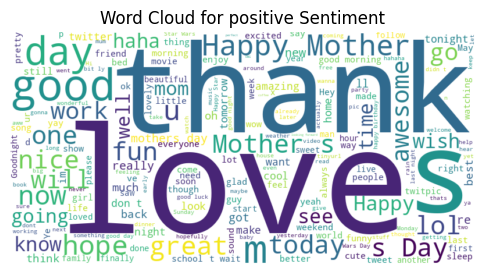

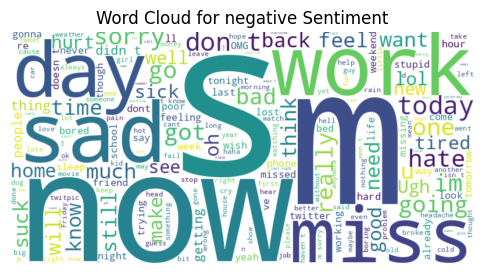

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for a specific sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(data[data['sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

# Generate word clouds for positive and negative sentiment categories
generate_word_cloud('positive')
generate_word_cloud('negative')


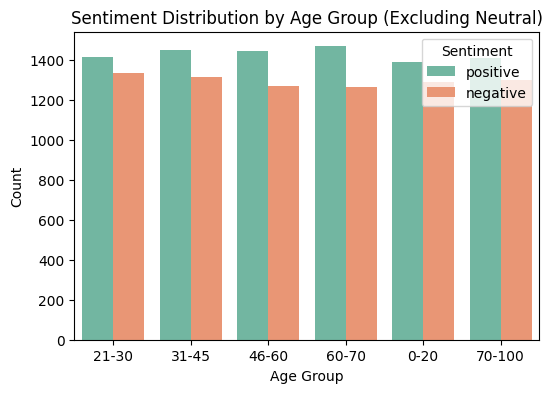

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data to exclude neutral sentiment
filtered_data = data[data['sentiment'] != 'neutral']

# Plot count plot for positive and negative sentiments by age group
plt.figure(figsize=(6, 4))
sns.countplot(x='Age of User', hue='sentiment', data=filtered_data, palette='Set2', hue_order=['positive', 'negative'])
plt.title('Sentiment Distribution by Age Group (Excluding Neutral)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


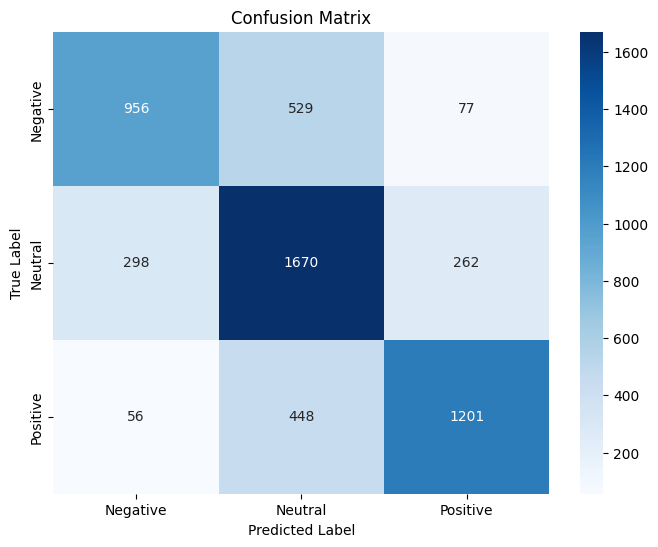

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are the true and predicted sentiment labels
# Replace y_true and y_pred with your actual true and predicted sentiment labels

# Compute confusion matrix
cm = confusion_matrix(y_test, lr_pred)

# Define labels for the confusion matrix
labels = ['Negative', 'Neutral', 'Positive']  # Assuming sentiment labels are 'Negative', 'Neutral', 'Positive'

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib
# Save logistic regression model
joblib.dump(lr_classifier, 'sentiment_model.pkl')
# Save SVM model
joblib.dump(svm_model, 'svm_model.pkl')
